In [ ]:
p = (p9.ggplot(data = plot_df,mapping=p9.aes(x="model_cat",y="accuracy", fill="model_type")) 
 + p9.geom_bar(stat="identity")
 + p9.geom_errorbar(mapping=p9.aes(x="model_cat", ymin="acc_low",ymax="acc_high"))
 + p9.geom_hline(mapping=p9.aes(yintercept="acc_close"), linetype="dashed")
 + p9.scale_fill_manual(values=["lightblue","steelblue","salmon","crimson"])
 + p9.facet_wrap('~motif_cat')
 + p9.labs(x="", y="Nucleotide Reconstruction Accuracy", fill = 'Model Type')
 + p9.theme_light()
 + p9.coord_cartesian(ylim=(0,1))
 + p9.theme(legend_position="none",
            legend_text=p9.element_text(size=9),legend_title=p9.element_text(size=9),
            subplots_adjust={'wspace': 0.1},
            axis_text_x=p9.element_text(rotation=45, hjust=1, rotation_mode='anchor'),
            legend_box_margin=0,legend_key_width=6,
            axis_title=p9.element_text(size=10))
)

In [1]:
import plotnine as p9
import pandas as pd
import patchworklib as pw 
import numpy as np
from scipy import stats

path = 'wandb_export_2024-04-23T14 00 03.344+02 00.csv'

plotsize = (2,2)

data = pd.read_csv(path)

data_first = data[data["Step"] < 10_000]

data_last = data.sample(frac=0.05)[data["Step"] >= 2_500]
data_last = data_last[(np.abs(stats.zscore(data_last)) < 3).all(axis=1)]

p1 = (p9.ggplot(data=data.sample(frac=0.05), mapping=p9.aes(x='Step', y='loss'))
    + p9.geom_point(size=0.1))


p2 = (p9.ggplot(data=data_first, mapping=p9.aes(x='Step', y='loss'))
    + p9.geom_point(size=0.1))

p3 = (p9.ggplot(data=data_last, mapping=p9.aes(x='Step', y='loss'))
    + p9.geom_point(size=0.1)
    + p9.geom_smooth(data=data_last[data_last["Step"] <100_000], method="lowess", color="crimson", span = 0.05)
    + p9.geom_smooth(data=data_last[data_last["Step"] >100_000], method="lowess", color="crimson", span = 0.05))

#g1 = pw.load_ggplot(p1, figsize=plotsize)
#g2 = pw.load_ggplot(p2, figsize=plotsize)
#g3 = pw.load_ggplot(p3, figsize=plotsize)

p1.save("all_loss.png", width=3, height=2)
p2.save("first_loss.png", width=3, height=2)
p3.save("second_loss.png", width=3, height=2)

<Figure size 100x100 with 0 Axes>

In [3]:
path_ce = 'Cross_Entropy.csv'
path_ma = 'masked_accuracy.csv'

data_ce = pd.read_csv(path_ce)[1:]
data_ma = pd.read_csv(path_ma)[1:]

p4 = (p9.ggplot(data=data_ma, mapping=p9.aes(x='Step', y='Masked Accuracy'))
      + p9.geom_line())

p5 = (p9.ggplot(data=data_ce, mapping=p9.aes(x='Step', y='Cross Entropy'))
      + p9.geom_line())

p4.save("ma.png", width=3, height=2)
p5.save("ce.png", width=3, height=2)

In [88]:
g12 = (g1 | g2 )

In [89]:
g345 = (g3 | g4 | g5)

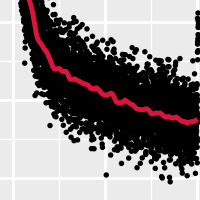

In [90]:
complete_g = g12 / g345
complete_g.change_plotsize((2,2))
complete_g.savefig("all.png")